<a href="https://colab.research.google.com/github/myan105/MachineLearning/blob/main/Bayes_based_Classifiers_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW 3: Bayes-based Classifiers and SVM**
**HW Due date is 03/11/2025, 23:59 pm**

Objective:
* To understand the basics of Naive Bayes, and SVM classifiers.
* To practice building these models using sample datasets.
* To visualize model performance and apply hyperparameter tuning techniques.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving processed-1.cleveland.data to processed-1.cleveland.data


In [ ]:
import pandas as pd
import io
# Load the Cleveland Heart Disease dataset
# Replace 'path_to_your_file.data' with the actual path to your .data file
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
heart_df = pd.read_csv(io.BytesIO(uploaded[file_name]), header=None, delimiter=',')
selected_columns = [0, 1, 2, 3, 4, 13] # for now we only use first 5 attributes and target class. You might want to include other attributes to see how the accuracy of the trained models are changing!
heart_df = heart_df.iloc[:, selected_columns]
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'HD']
heart_df.columns = column_names
heart_df['HD'] = (heart_df['HD'] > 0).astype(int) #This line converts the 'HD' column into a binary attribute, where any value greater
 # than 0 is considered as presence of heart disease (1), and 0 otherwise."""

# dataset is from this link: https://archive.ics.uci.edu/dataset/45/heart+disease
#sex: sex (1 = male; 0 = female)
"""cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic"""
#trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#chol: serum cholestoral in mg/dl
"""HD: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing"""

'HD: diagnosis of heart disease (angiographic disease status)\n-- Value 0: < 50% diameter narrowing\n-- Value 1: > 50% diameter narrowing'

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pgmpy.models import BayesianNetwork


# Splitting features and target
X = heart_df.drop(columns=['HD'])
y = heart_df['HD']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
## Your code starts here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_standardized = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_standardized = pd.DataFrame(X_test_scaled, columns=X.columns)
print(X_train_standardized.head())
## Your code ends here

        age       sex        cp  trestbps      chol
0 -2.838504  0.722504 -1.104690 -0.125982 -0.864142
1  0.241352  0.722504 -0.092057  0.974653 -2.483637
2  1.561291  0.722504 -2.117322  1.524970 -0.241260
3  1.121311 -1.384075 -0.092057  1.524970  2.374848
4 -0.308622  0.722504  0.920575 -1.336680 -0.262023


Use Naive Bayes classifier to get a model.

In [ ]:
!pip install -U scikit-learn

In [ ]:
# Step 3: Initial Evaluation with Naive Bayes
## Your code starts here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()
# Train the classifier on the training data
y_pred = nb_classifier.fit(X_train_standardized, y_train)
# Predict on the test set
y_pred = nb_classifier.predict(X_test_standardized)
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy:.4f}')
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
## Your code ends here

Naive Bayes Accuracy: 0.6721
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.66      0.66        29
           1       0.69      0.69      0.69        32

    accuracy                           0.67        61
   macro avg       0.67      0.67      0.67        61
weighted avg       0.67      0.67      0.67        61



**Question:** I got an accuracy of 67.2%. What can you do to improve on that using Naive Bayes Classifier?

**Answer:** We can improve Naive Bayes Accuracy's performance by tuning hyperparameters in GaussianNB. We can also compare Naive Bayes with other models, such as Random Forest or SVM to improve the model's accuracy.

Correlation Matrix:
               age       sex        cp  trestbps      chol
age       1.000000 -0.079587  0.106447  0.298823  0.175419
sex      -0.079587  1.000000 -0.030451 -0.027781 -0.151377
cp        0.106447 -0.030451  1.000000 -0.053508  0.058936
trestbps  0.298823 -0.027781 -0.053508  1.000000  0.122404
chol      0.175419 -0.151377  0.058936  0.122404  1.000000


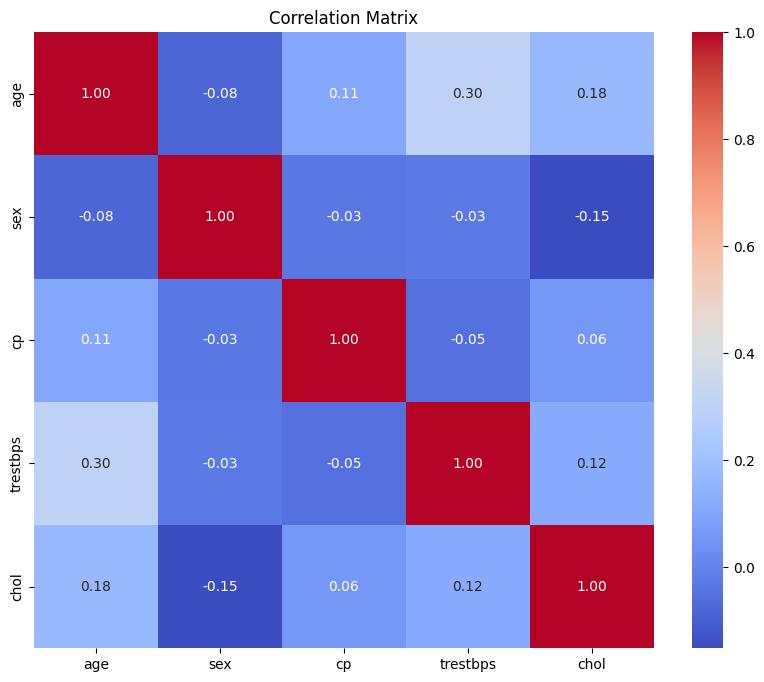

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix
## Your code starts here
correlation_matrix = X_train_standardized.corr()
## Your code ends here

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# You can also visualize the correlation matrix for better interpretation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Now, Apply SVM models to the same dataset!

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Comparison with SVM Classifiers: apply linear and a non-linear SVM classifiers
## Your code starts here
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_standardized, y_train)
linear_svm_accuracy = linear_svm.score(X_test_standardized, y_test)
## Your code ends here
print("Linear SVM Accuracy:", linear_svm_accuracy)

## Your code starts here
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train_standardized, y_train)
nonlinear_svm_accuracy = nonlinear_svm.score(X_test_standardized, y_test)
## Your code ends here
print("Non-linear SVM Accuracy:", nonlinear_svm_accuracy)

# Task 3: Exploring Different Kernels
kernels = ['poly', 'rbf', 'sigmoid']
for kernel in kernels:
## Your code starts here
  svm_model = SVC(kernel=kernel)
  svm_model.fit(X_train_standardized, y_train)
  accuracy = svm_model.score(X_test_standardized, y_test)
  print(f"SVM with {kernel} kernel Accuracy:", accuracy)
## Your code ends here

# Task 4: Hyperparameter Tuning : Use GridSearchCV to find the best hyperparameters and print them out
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
svm_classifier = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)## Your code starts here
grid_search.fit(X_train_standardized, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

## Your code ends here



Linear SVM Accuracy: 0.7377049180327869
Non-linear SVM Accuracy: 0.7704918032786885
SVM with poly kernel Accuracy: 0.8360655737704918
SVM with rbf kernel Accuracy: 0.7704918032786885
SVM with sigmoid kernel Accuracy: 0.639344262295082
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'C': 10, 'gamma': 0.1}
Best Accuracy: 0.772704081632653


# Submission Guidelines:

* Implement the above steps in a Jupyter Notebook file.
* Save your ipython code and name it as: lastname_firstname_HW3.ipynb (.ipynb extension)
* Include comments and explanations to describe your approach and the rationale behind each step.
* Submit on Canvas.